# 多分类问题

In [24]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [32]:
class LogisticRegressionMultiClass:
    def __init__(self, learning_rate=0.01, max_iter=1000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # 初始化参数
        num_samples, num_features = X.shape
        num_classes = len(np.unique(y))
        self.weights = np.zeros((num_features, num_classes))
        self.bias = np.zeros(num_classes)

        # 将标签转换为 one-hot 编码
        y_one_hot = self.one_hot(y, num_classes)

        # 梯度下降
        for _ in range(self.max_iter):
            model = np.dot(X, self.weights) + self.bias
            y_predicted = self.softmax(model)

            # 计算梯度
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y_one_hot))
            db = (1 / num_samples) * np.sum(y_predicted - y_one_hot, axis=0)

            # 更新参数
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict_proba(self, X):
        model = np.dot(X, self.weights) + self.bias
        y_prob = self.softmax(model)
        return y_prob

    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        y_predicted = self.softmax(model)
        return np.argmax(y_predicted, axis=1)

    @staticmethod
    def softmax(z):
        exp_scores = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    @staticmethod
    def one_hot(y, num_classes):
        one_hot = np.zeros((len(y), num_classes))
        one_hot[np.arange(len(y)), y] = 1
        return one_hot


In [ ]:
# 生成模拟数据
X, y = make_classification(n_samples=1000, n_features=10, n_classes=3, n_clusters_per_class=1, random_state=42)

# 数据预处理
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 创建并训练模型
model = LogisticRegressionMultiClass(learning_rate=0.01, max_iter=1000)
model.fit(X_train, y_train)

# 进行预测
predictions = model.predict(X_test)


In [28]:
predictions

array([1, 0, 1, 1, 2, 2, 0, 0, 2, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 0, 0, 1, 1, 2, 0, 2, 2, 2, 2, 0, 2, 2, 1, 0, 0, 2, 0,
       2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 1, 1, 1, 2, 0, 2, 2, 2, 2, 1, 1,
       2, 0, 2, 2, 0, 2, 1, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0,
       1, 2, 1, 1, 2, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2,
       0, 2, 1, 0, 1, 2, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 1, 2, 1,
       1, 2, 1, 1, 2, 2, 2, 1, 0, 1, 1, 0, 0, 1, 1, 2, 2, 1, 0, 1, 0, 0,
       2, 2, 1, 2, 2, 1, 0, 1, 1, 1, 2, 2, 2, 1, 0, 1, 2, 0, 1, 0, 2, 1,
       2, 2, 0, 2, 0, 1, 2, 2, 0, 1, 2, 2, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1,
       0, 2])

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix

# 计算准确率
acc = accuracy_score(y_test, predictions)
print(f"Accuracy: {acc}")

# 输出混淆矩阵
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", cm)


Accuracy: 0.8566666666666667
Confusion Matrix:
 [[ 64  15   9]
 [ 10  86   1]
 [  3   5 107]]


In [35]:
y_score=model.predict_proba(X_test)

In [36]:
y_score

array([[4.15006235e-01, 5.69704861e-01, 1.52889047e-02],
       [5.18758974e-01, 4.48749493e-01, 3.24915331e-02],
       [4.11112040e-02, 9.58512587e-01, 3.76208642e-04],
       [2.11230811e-01, 7.60990326e-01, 2.77788626e-02],
       [3.34235337e-01, 1.21294288e-02, 6.53635234e-01],
       [2.91865225e-01, 1.87374974e-01, 5.20759801e-01],
       [7.92383595e-01, 1.26832524e-01, 8.07838812e-02],
       [7.55409807e-01, 1.66310627e-02, 2.27959131e-01],
       [7.00896927e-02, 2.71884150e-01, 6.58026157e-01],
       [2.15615619e-03, 8.87626199e-01, 1.10217645e-01],
       [6.14572625e-02, 8.46104659e-01, 9.24380788e-02],
       [5.09046203e-01, 4.68801412e-02, 4.44073656e-01],
       [6.29694670e-01, 3.35432762e-01, 3.48725680e-02],
       [2.86480273e-01, 6.54112384e-01, 5.94073428e-02],
       [3.01427487e-02, 9.26986770e-01, 4.28704815e-02],
       [1.25171305e-01, 3.23771939e-02, 8.42451501e-01],
       [3.40277877e-01, 6.25896220e-01, 3.38259032e-02],
       [3.48360646e-02, 9.34581

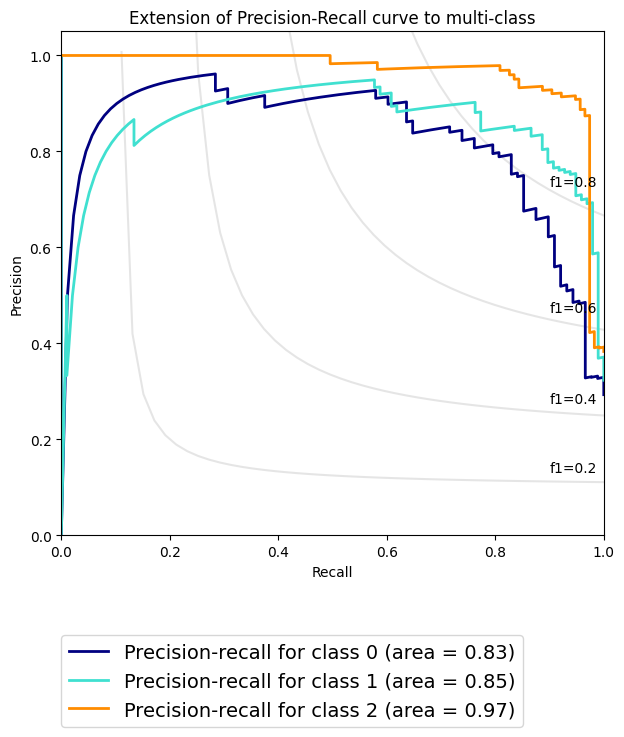

In [37]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# 假设 y_test 是真实标签，y_score 是模型预测的概率
# 将标签二值化
n_classes = len(np.unique(y_test))
y_test_binarized = label_binarize(y_test, classes=np.arange(n_classes))

# 为每个类别计算Precision-Recall曲线和平均精度
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_binarized[:, i], y_score[:, i])

# 绘制所有类别的曲线
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])
plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))

plt.show()


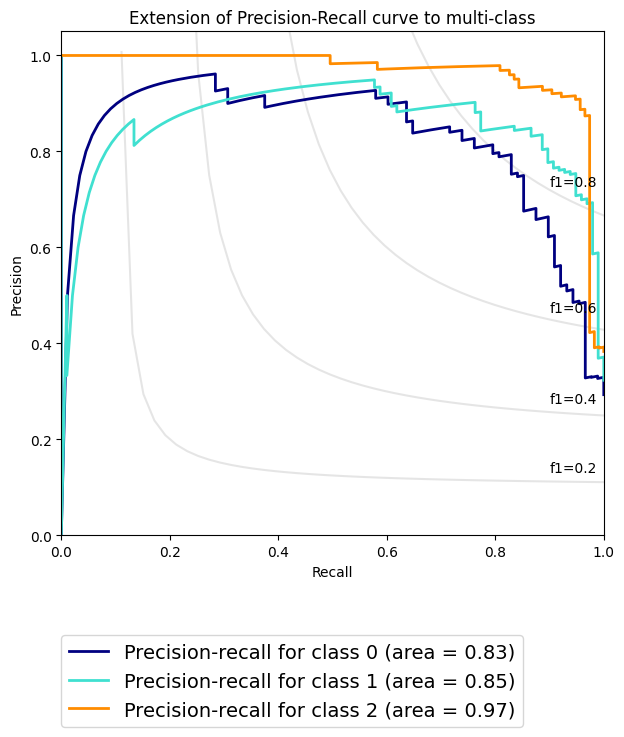

In [37]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# 假设 y_test 是真实标签，y_score 是模型预测的概率
# 将标签二值化
n_classes = len(np.unique(y_test))
y_test_binarized = label_binarize(y_test, classes=np.arange(n_classes))

# 为每个类别计算Precision-Recall曲线和平均精度
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_binarized[:, i], y_score[:, i])

# 绘制所有类别的曲线
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])
plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))

plt.show()


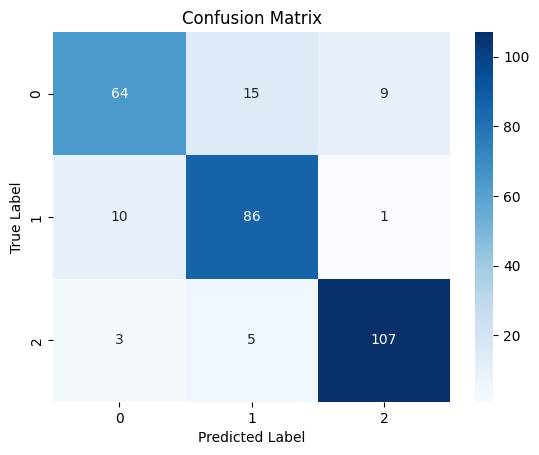

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


# 计算混淆矩阵
cm = confusion_matrix(y_test, predictions)

# 绘制混淆矩阵
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
